In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

### Reading and viewing the data



In [2]:
bike_data = pd.read_csv('bike.csv')

#bike_data.info()
bike_data.head()


,ID,PARK_AREA_ACRES,CTA_BUS_STATIONS,CTA_TRAIN_STATIONS,BIKE_ROUTES,Limited_Business_License,Retail_Food_Establishment,CAPACITY,PER_CAPITA_INCOME,POPULATION_SQ_MILE,...,PROSTITUTION,PUBLIC_INDECENCY,PUBLIC_PEACE_VIOLATION,ROBBERY,SEX_OFFENSE,STALKING,THEFT,WEAPONS_VIOLATION,trips,i
0,5,998.35328,217,19,37.260009,419417,118269,19,65526,36691.00331,...,2.397895,1.386294,4.369448,5.752573,3.951244,1.609438,8.269501,3.044522,10.092826,33
1,13,1204.28480,152,6,23.544022,42998,27496,19,65526,26901.43828,...,0.693147,0.000000,2.564949,4.905275,2.708050,1.098612,7.312553,0.693147,10.350798,33
2,14,1135.55648,133,2,21.615016,57119,23273,15,65526,27738.26651,...,1.609438,0.000000,2.639057,3.688879,1.098612,1.386294,6.089045,2.397895,9.227001,33
3,15,1108.60416,146,2,17.309916,31090,14369,15,88669,28008.49477,...,1.609438,0.000000,3.178054,3.891820,1.945910,1.386294,6.171701,2.944439,9.279493,33
4,16,955.64416,153,3,15.953728,43002,19727,11,65526,24577.70577,...,0.693147,0.000000,2.302585,5.351858,2.564949,0.000000,7.658700,2.397895,9.846441,33


### Listing down the ciolumns

In [3]:
for col in bike_data.columns:
    print(col)

ID
PARK_AREA_ACRES
CTA_BUS_STATIONS
CTA_TRAIN_STATIONS
BIKE_ROUTES
Limited_Business_License
Retail_Food_Establishment
CAPACITY
PER_CAPITA_INCOME
POPULATION_SQ_MILE
CBD
MINORITY
EDU
ARSON
ASSAULT
BATTERY
BURGLARY
CONCEALED_CARRY_LICENSE_VIOLATIO
CRIM_SEXUAL_ASSAULT
CRIMINAL_DAMAGE
CRIMINAL_TRESPASS
DECEPTIVE_PRACTICE
GAMBLING
HOMICIDE
HUMAN_TRAFFICKING
INTERFERENCE_WITH_PUBLIC_OFFICER
INTIMIDATION
KIDNAPPING
LIQUOR_LAW_VIOLATION
MOTOR_VEHICLE_THEFT
NARCOTICS
NON_CRIMINAL
OBSCENITY
OFFENSE_INVOLVING_CHILDREN
OTHER_NARCOTIC_VIOLATION
OTHER_OFFENSE
PROSTITUTION
PUBLIC_INDECENCY
PUBLIC_PEACE_VIOLATION
ROBBERY
SEX_OFFENSE
STALKING
THEFT
WEAPONS_VIOLATION
trips
i


### Clubbing different types of crimes under broader categories | drawing inspiration for this from the previous assignment's suggestion for CBD.

In [4]:
category_2_crime_dict = dict()

category_2_crime_dict["violent_crimes"] = [
    "HOMICIDE",
    "ASSAULT",
    "BATTERY",
    "KIDNAPPING"    
]


category_2_crime_dict["harrassment_crimes"] = [

    "INTIMIDATION",
    "STALKING"
]


category_2_crime_dict["property_crimes"] = [
    "BURGLARY",
    "MOTOR_VEHICLE_THEFT",
    "THEFT",
    "ARSON",
    "CRIMINAL_DAMAGE",
    "CRIMINAL_TRESPASS",
    "ROBBERY"
    
]


category_2_crime_dict["sex_crimes"] = [
    "CRIM_SEXUAL_ASSAULT",
    "SEX_OFFENSE",
    "PROSTITUTION",
    "HUMAN_TRAFFICKING",
    "PUBLIC_INDECENCY"    
]


category_2_crime_dict["drug_related_crimes"] = [
    "NARCOTICS",
    "OTHER_NARCOTIC_VIOLATION"
]


category_2_crime_dict["white_collar_financial_crimes"] = [

    "DECEPTIVE_PRACTICE"
    
]


category_2_crime_dict["weapons_offenses"] = [

    "WEAPONS_VIOLATION",
    "CONCEALED_CARRY_LICENSE_VIOLATIO"
    
]


category_2_crime_dict["public_order_crimes"] = [

    "PUBLIC_PEACE_VIOLATION",
    "GAMBLING",
    "LIQUOR_LAW_VIOLATION",
    "INTERFERENCE_WITH_PUBLIC_OFFICER"

]


category_2_crime_dict["crimes_against_children"] = [
    "OFFENSE_INVOLVING_CHILDREN"
]

category_2_crime_dict["miscellaneous_crimes"] = [

    "OBSCENITY",
    "OTHER_OFFENSE"
    
]

### Deriving the values for the broader categories | drawing inspiration for this from the previous assignment's suggestion for CBD.

In [5]:
list_of_all_crimes = list()

for broader_category, crimes in category_2_crime_dict.items():
    list_of_all_crimes.extend( crimes )

set(bike_data.columns) - set(list_of_all_crimes) 

{'BIKE_ROUTES',
 'CAPACITY',
 'CBD',
 'CTA_BUS_STATIONS',
 'CTA_TRAIN_STATIONS',
 'EDU',
 'ID',
 'Limited_Business_License',
 'MINORITY',
 'NON_CRIMINAL',
 'PARK_AREA_ACRES',
 'PER_CAPITA_INCOME',
 'POPULATION_SQ_MILE',
 'Retail_Food_Establishment',
 'i',
 'trips'}

### Repeating this process for variables related to location as well.

In [6]:
category_2_area_dict = dict()

category_2_area_dict["central_business_district_index"] = [

    "CBD",
    "Limited_Business_License",
    "Retail_Food_Establishment",
    "CAPACITY"
]


category_2_area_dict["transportation_accessibility_index"] = [

    "CTA_BUS_STATIONS",
    "CTA_TRAIN_STATIONS"
    
]

category_2_area_dict["urban_suburban_spectrum_indicator"] = [

    "PARK_AREA_ACRES",
    "POPULATION_SQ_MILE",
    "BIKE_ROUTES"    
    
]


category_2_area_dict["socioeconomic_status_indicator"] = [

    "PER_CAPITA_INCOME",
    "MINORITY"
    
]

In [7]:
list_of_all_area_indicators = list()

for broader_category, indicators in category_2_area_dict.items():
    list_of_all_area_indicators.extend( indicators )
list_of_all_area_indicators    

['CBD',
 'Limited_Business_License',
 'Retail_Food_Establishment',
 'CAPACITY',
 'CTA_BUS_STATIONS',
 'CTA_TRAIN_STATIONS',
 'PARK_AREA_ACRES',
 'POPULATION_SQ_MILE',
 'BIKE_ROUTES',
 'PER_CAPITA_INCOME',
 'MINORITY']

In [8]:
set(bike_data.columns) - set(list_of_all_area_indicators) 

{'ARSON',
 'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CONCEALED_CARRY_LICENSE_VIOLATIO',
 'CRIMINAL_DAMAGE',
 'CRIMINAL_TRESPASS',
 'CRIM_SEXUAL_ASSAULT',
 'DECEPTIVE_PRACTICE',
 'EDU',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN_TRAFFICKING',
 'ID',
 'INTERFERENCE_WITH_PUBLIC_OFFICER',
 'INTIMIDATION',
 'KIDNAPPING',
 'LIQUOR_LAW_VIOLATION',
 'MOTOR_VEHICLE_THEFT',
 'NARCOTICS',
 'NON_CRIMINAL',
 'OBSCENITY',
 'OFFENSE_INVOLVING_CHILDREN',
 'OTHER_NARCOTIC_VIOLATION',
 'OTHER_OFFENSE',
 'PROSTITUTION',
 'PUBLIC_INDECENCY',
 'PUBLIC_PEACE_VIOLATION',
 'ROBBERY',
 'SEX_OFFENSE',
 'STALKING',
 'THEFT',
 'WEAPONS_VIOLATION',
 'i',
 'trips'}

In [9]:
list_of_all_area_indicators.extend(list_of_all_crimes)
set(bike_data.columns) - set(list_of_all_area_indicators)

{'EDU', 'ID', 'NON_CRIMINAL', 'i', 'trips'}

In [10]:
# bike_data['ID'].unique()

In [11]:
# bike_data['i'].unique()

### Looking at all the new columns together

In [12]:
list_of_new_columns = list( category_2_crime_dict.keys() ) + list( category_2_area_dict.keys() )
for col in list_of_new_columns:
    print(col)

violent_crimes
harrassment_crimes
property_crimes
sex_crimes
drug_related_crimes
white_collar_financial_crimes
weapons_offenses
public_order_crimes
crimes_against_children
miscellaneous_crimes
central_business_district_index
transportation_accessibility_index
urban_suburban_spectrum_indicator
socioeconomic_status_indicator


### ID and i can be ignored.

In [13]:
bike_data_selected = bike_data.drop(['ID', 'i'], axis=1)
bike_data_selected.columns

Index(['PARK_AREA_ACRES', 'CTA_BUS_STATIONS', 'CTA_TRAIN_STATIONS',
       'BIKE_ROUTES', 'Limited_Business_License', 'Retail_Food_Establishment',
       'CAPACITY', 'PER_CAPITA_INCOME', 'POPULATION_SQ_MILE', 'CBD',
       'MINORITY', 'EDU', 'ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED_CARRY_LICENSE_VIOLATIO', 'CRIM_SEXUAL_ASSAULT',
       'CRIMINAL_DAMAGE', 'CRIMINAL_TRESPASS', 'DECEPTIVE_PRACTICE',
       'GAMBLING', 'HOMICIDE', 'HUMAN_TRAFFICKING',
       'INTERFERENCE_WITH_PUBLIC_OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR_LAW_VIOLATION', 'MOTOR_VEHICLE_THEFT', 'NARCOTICS',
       'NON_CRIMINAL', 'OBSCENITY', 'OFFENSE_INVOLVING_CHILDREN',
       'OTHER_NARCOTIC_VIOLATION', 'OTHER_OFFENSE', 'PROSTITUTION',
       'PUBLIC_INDECENCY', 'PUBLIC_PEACE_VIOLATION', 'ROBBERY', 'SEX_OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS_VIOLATION', 'trips'],
      dtype='object')

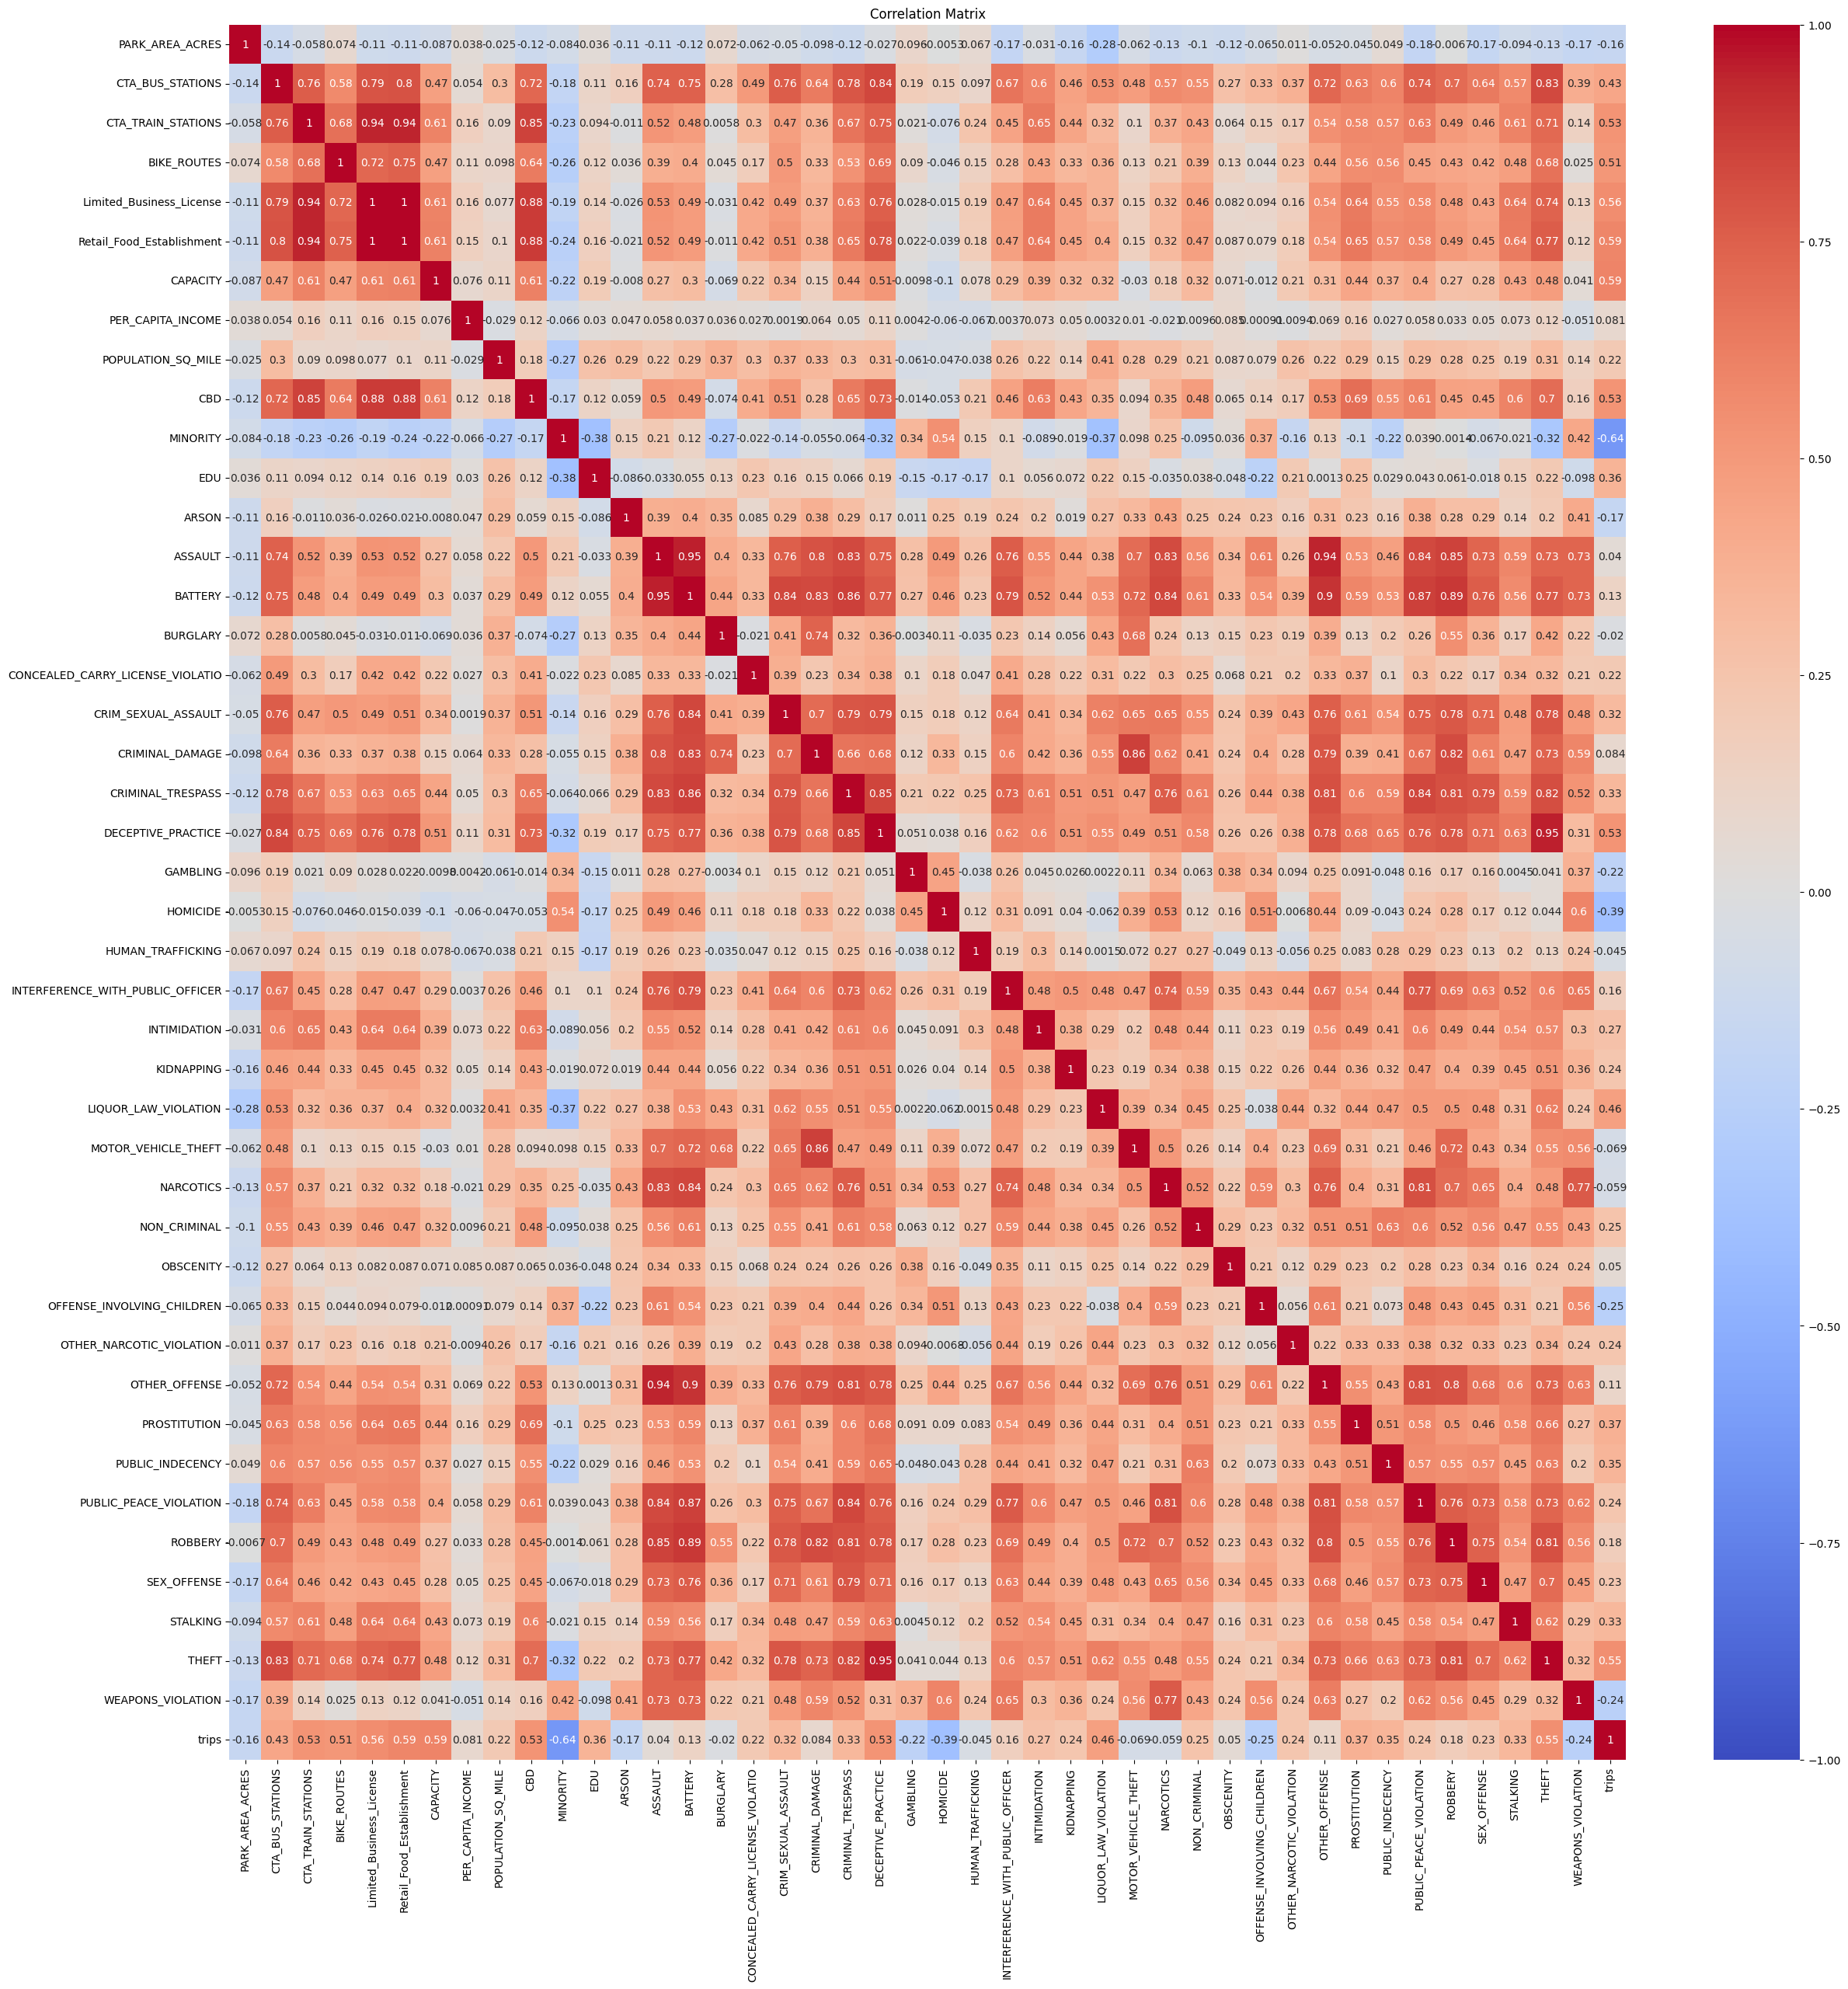

In [14]:
correlation_matrix = bike_data_selected.corr()

# Visualize the correlation matrix
plt.figure(figsize=(29, 29))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [15]:
corr_with_trips = correlation_matrix['trips'].sort_values(ascending=False)
print(f"Correlations for {corr_with_trips}:")

Correlations for trips                               1.000000
CAPACITY                            0.594428
Retail_Food_Establishment           0.593184
Limited_Business_License            0.560613
THEFT                               0.551326
DECEPTIVE_PRACTICE                  0.528705
CBD                                 0.526904
CTA_TRAIN_STATIONS                  0.526220
BIKE_ROUTES                         0.511121
LIQUOR_LAW_VIOLATION                0.461340
CTA_BUS_STATIONS                    0.430032
PROSTITUTION                        0.369083
EDU                                 0.358447
PUBLIC_INDECENCY                    0.350559
CRIMINAL_TRESPASS                   0.330410
STALKING                            0.329017
CRIM_SEXUAL_ASSAULT                 0.315757
INTIMIDATION                        0.267312
NON_CRIMINAL                        0.251042
PUBLIC_PEACE_VIOLATION              0.241828
OTHER_NARCOTIC_VIOLATION            0.241255
KIDNAPPING                          0.

In [16]:
corr_with_trips[:7].keys()

Index(['trips', 'CAPACITY', 'Retail_Food_Establishment',
       'Limited_Business_License', 'THEFT', 'DECEPTIVE_PRACTICE', 'CBD'],
      dtype='object')

### SUGGESTION FROM PREVIOUS ASSIGNMENT
You may want to form composite variables. For example, you could form a new
variable that measures the extent that a station is located in a “central business
district” (CBD). Many variables indicate a CBD, such as having many businesses
and train stations, while residential neighborhoods will have fewer businesses. For
each observation, you could average variables that you have to measure CBD. You
will also want to group crime variables into types of crimes.

### Create a scatterplot

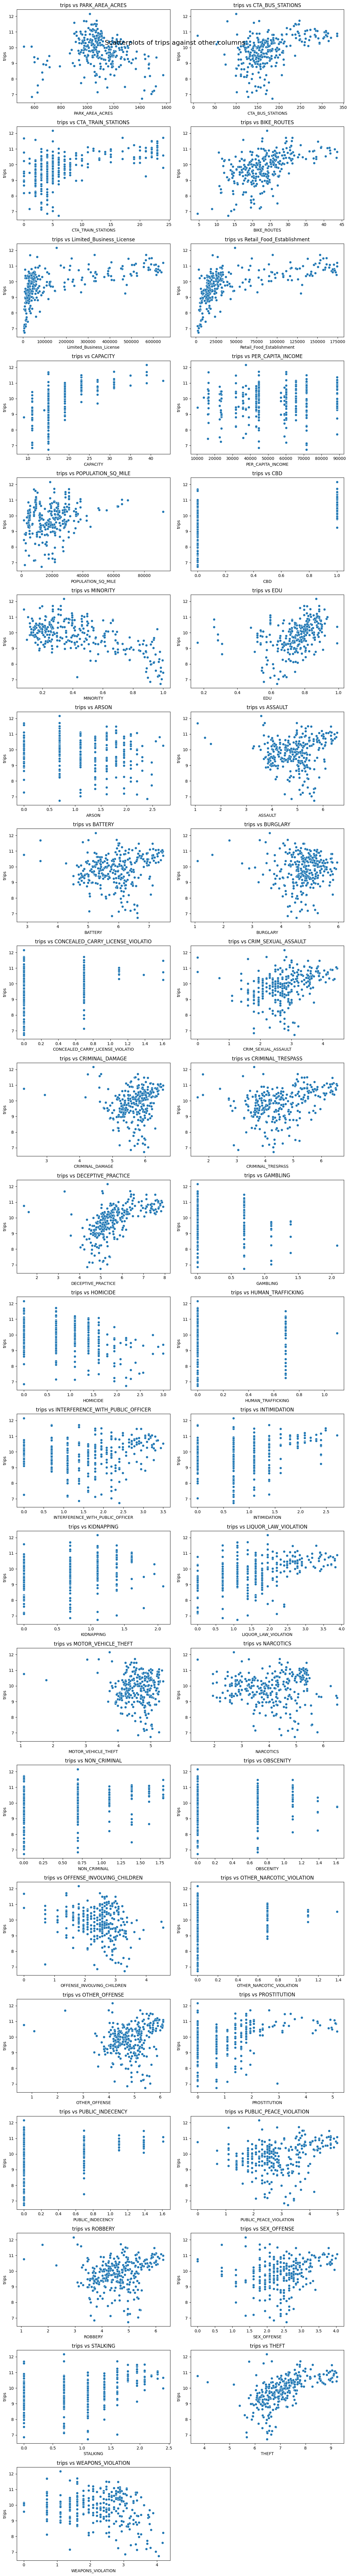

In [17]:

# Specify the column to plot against others
target_column = 'trips'  # Replace with your desired column name

# Get the list of other columns
other_columns = [col for col in bike_data_selected.columns if col != target_column]

# Calculate the number of rows needed for subplots
n_rows = (len(other_columns) + 1) // 2  # Round up to the nearest integer

# Create subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))
fig.suptitle(f'Scatterplots of {target_column} against other columns', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create scatterplots
for i, column in enumerate(other_columns):
    sns.scatterplot(data = bike_data_selected, x = column, y = target_column, ax = axes[i])
    axes[i].set_title(f'{target_column} vs {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Create a dataframe where the columns are composites of other predictors/variables

In [18]:
bike_composite = pd.DataFrame()

In [19]:
for key, cols in category_2_crime_dict.items():
    bike_composite[key] = bike_data[ cols  ].mean( axis = 1 )

bike_composite.head()

,violent_crimes,harrassment_crimes,property_crimes,sex_crimes,drug_related_crimes,white_collar_financial_crimes,weapons_offenses,public_order_crimes,crimes_against_children,miscellaneous_crimes
0,3.782505,1.497866,5.253022,2.402420,2.654134,7.036148,1.522261,2.449698,3.178054,2.734030
1,2.743382,1.098612,4.649653,1.315850,1.791759,5.587249,0.346574,1.334385,1.945910,2.381087
2,3.142549,0.693147,4.303136,1.221850,2.152033,4.553877,1.545521,1.408697,3.091042,2.393746
3,3.258730,0.693147,4.507747,1.416342,2.402011,4.454347,1.818793,1.599232,2.995732,2.488367
4,3.305614,0.000000,5.043972,1.229694,1.985146,5.587249,1.198948,1.724426,0.693147,2.292484


In [20]:
for key, cols in category_2_area_dict.items():
    bike_composite[key] = bike_data[ cols  ].mean( axis = 1 )

bike_composite.head()

,violent_crimes,harrassment_crimes,property_crimes,sex_crimes,drug_related_crimes,white_collar_financial_crimes,weapons_offenses,public_order_crimes,crimes_against_children,miscellaneous_crimes,central_business_district_index,transportation_accessibility_index,urban_suburban_spectrum_indicator,socioeconomic_status_indicator
0,3.782505,1.497866,5.253022,2.402420,2.654134,7.036148,1.522261,2.449698,3.178054,2.734030,134426.50,118.0,12575.538866,32763.119408
1,2.743382,1.098612,4.649653,1.315850,1.791759,5.587249,0.346574,1.334385,1.945910,2.381087,17628.25,79.0,9376.422367,32763.069917
2,3.142549,0.693147,4.303136,1.221850,2.152033,4.553877,1.545521,1.408697,3.091042,2.393746,20101.75,67.5,9631.812669,32763.421953
3,3.258730,0.693147,4.507747,1.416342,2.402011,4.454347,1.818793,1.599232,2.995732,2.488367,11368.50,74.0,9711.469615,44334.932756
4,3.305614,0.000000,5.043972,1.229694,1.985146,5.587249,1.198948,1.724426,0.693147,2.292484,15685.00,78.0,8516.434553,32763.202079


### Given the widely different scales for the variables, let's standardize them.

In [21]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# bike_composite['trips'] = bike_data['trips']
bike_composite_normalized = pd.DataFrame(scaler.fit_transform(bike_composite), columns = bike_composite.columns)
bike_composite_normalized

,violent_crimes,harrassment_crimes,property_crimes,sex_crimes,drug_related_crimes,white_collar_financial_crimes,weapons_offenses,public_order_crimes,crimes_against_children,miscellaneous_crimes,central_business_district_index,transportation_accessibility_index,urban_suburban_spectrum_indicator,socioeconomic_status_indicator
0,1.239313,1.028713,1.175994,2.128938,1.034912,1.535902,0.616536,1.388944,1.136838,0.415519,1.468148,0.951839,1.343113,0.631055
1,-0.582588,0.369963,0.074633,0.024254,-0.533186,0.024276,-1.696299,-0.353799,-0.707463,-0.373683,-0.504545,-0.365858,0.593409,0.631050
2,0.117273,-0.299036,-0.557883,-0.157825,0.121916,-1.053832,0.662293,-0.237681,1.006597,-0.345377,-0.462768,-0.754410,0.653259,0.631084
3,0.320976,-0.299036,-0.184395,0.218906,0.576464,-1.157670,1.199879,0.060042,0.863935,-0.133799,-0.610271,-0.534793,0.671926,1.755197
4,0.403177,-1.442696,0.794405,-0.142631,-0.181542,0.024276,-0.019493,0.255664,-2.582627,-0.571805,-0.537366,-0.399645,0.391873,0.631063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-1.434796,-0.536367,-0.526745,-0.965126,-0.330310,-0.627159,-0.795027,-0.519775,-0.707463,-1.048180,-0.661708,-0.585474,0.591871,1.755167
296,0.953465,0.035463,0.166241,0.266051,0.822989,-0.900882,1.727881,1.292736,1.256648,0.231317,-0.702341,-0.196922,0.035003,0.317846
297,-0.549598,-0.870866,0.452800,0.072742,-0.350742,0.226148,-1.696299,-0.054079,-1.211102,-0.516170,-0.474439,-0.180029,0.586306,-0.453475
298,0.105592,1.028713,0.544842,-0.244271,-0.414945,-0.358500,0.066093,-0.655837,0.219129,-0.505368,-0.371222,-0.568581,-0.151420,-0.453455


In [22]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = bike_composite_normalized.select_dtypes(include=[np.number])  # Select numeric columns
# X = bike_composite.select_dtypes(include=[np.number])  # Select numeric columns

# Add a constant term to the predictors
X = add_constant(X)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort the dataframe by VIF in descending order
vif_data = vif_data.sort_values("VIF", ascending=False)

# Display the VIF results
print(vif_data[:-1])

                              Variable       VIF
6        white_collar_financial_crimes  8.753918
1                       violent_crimes  8.324619
12  transportation_accessibility_index  7.916262
11     central_business_district_index  7.771529
3                      property_crimes  6.422962
8                  public_order_crimes  5.840298
4                           sex_crimes  5.241250
5                  drug_related_crimes  4.836818
10                miscellaneous_crimes  4.186070
7                     weapons_offenses  3.786115
2                   harrassment_crimes  3.019494
9              crimes_against_children  2.041083
13   urban_suburban_spectrum_indicator  1.439726
14      socioeconomic_status_indicator  1.076220


In [23]:
# bike_composite['trips'] = bike_data['trips']

In [24]:
# trips_normalized = pd.DataFrame(scaler.fit_transform(bike_composite[ ['trips'] ]), columns = ['trips'])
# trips_normalized

The following have a higher than 5 VIF:

- white_collar_financial_crimes,
- violent_crimes,
- transportation_accessibility_index,
- central_business_district_index,
- property_crimes,
- public_order_crimes,

indicating that these have relatively higher correlation with the other predictors/variables.

And the following variables were found to have lower/moderate VIF:

- sex_crimes
- drug_related_crimes
- miscellaneous_crimes
- weapons_offenses
- harrassment_crimes
- crimes_against_children
- urban_suburban_spectrum_indicator
- socioeconomic_status_indicator




On encountering predictors with reasonably high VIFs, one of the next steps is to analyse the context-specific relationship between the predictors to try to decide whether to include them in the model, or drop them altogether.

However, before doing so, let's try to build a simple OLS and view the significance of the different predictors involved.



In [25]:
# bike_data['trips']

### Let's include trips as well so all correlations can be extracted.

In [26]:
scaler = StandardScaler()
bike_composite_normalized['trips'] = pd.DataFrame(scaler.fit_transform(bike_data[ ["trips"] ]), columns = ['trips'])



We can see this through a visualisation of the correlation matrix as well.

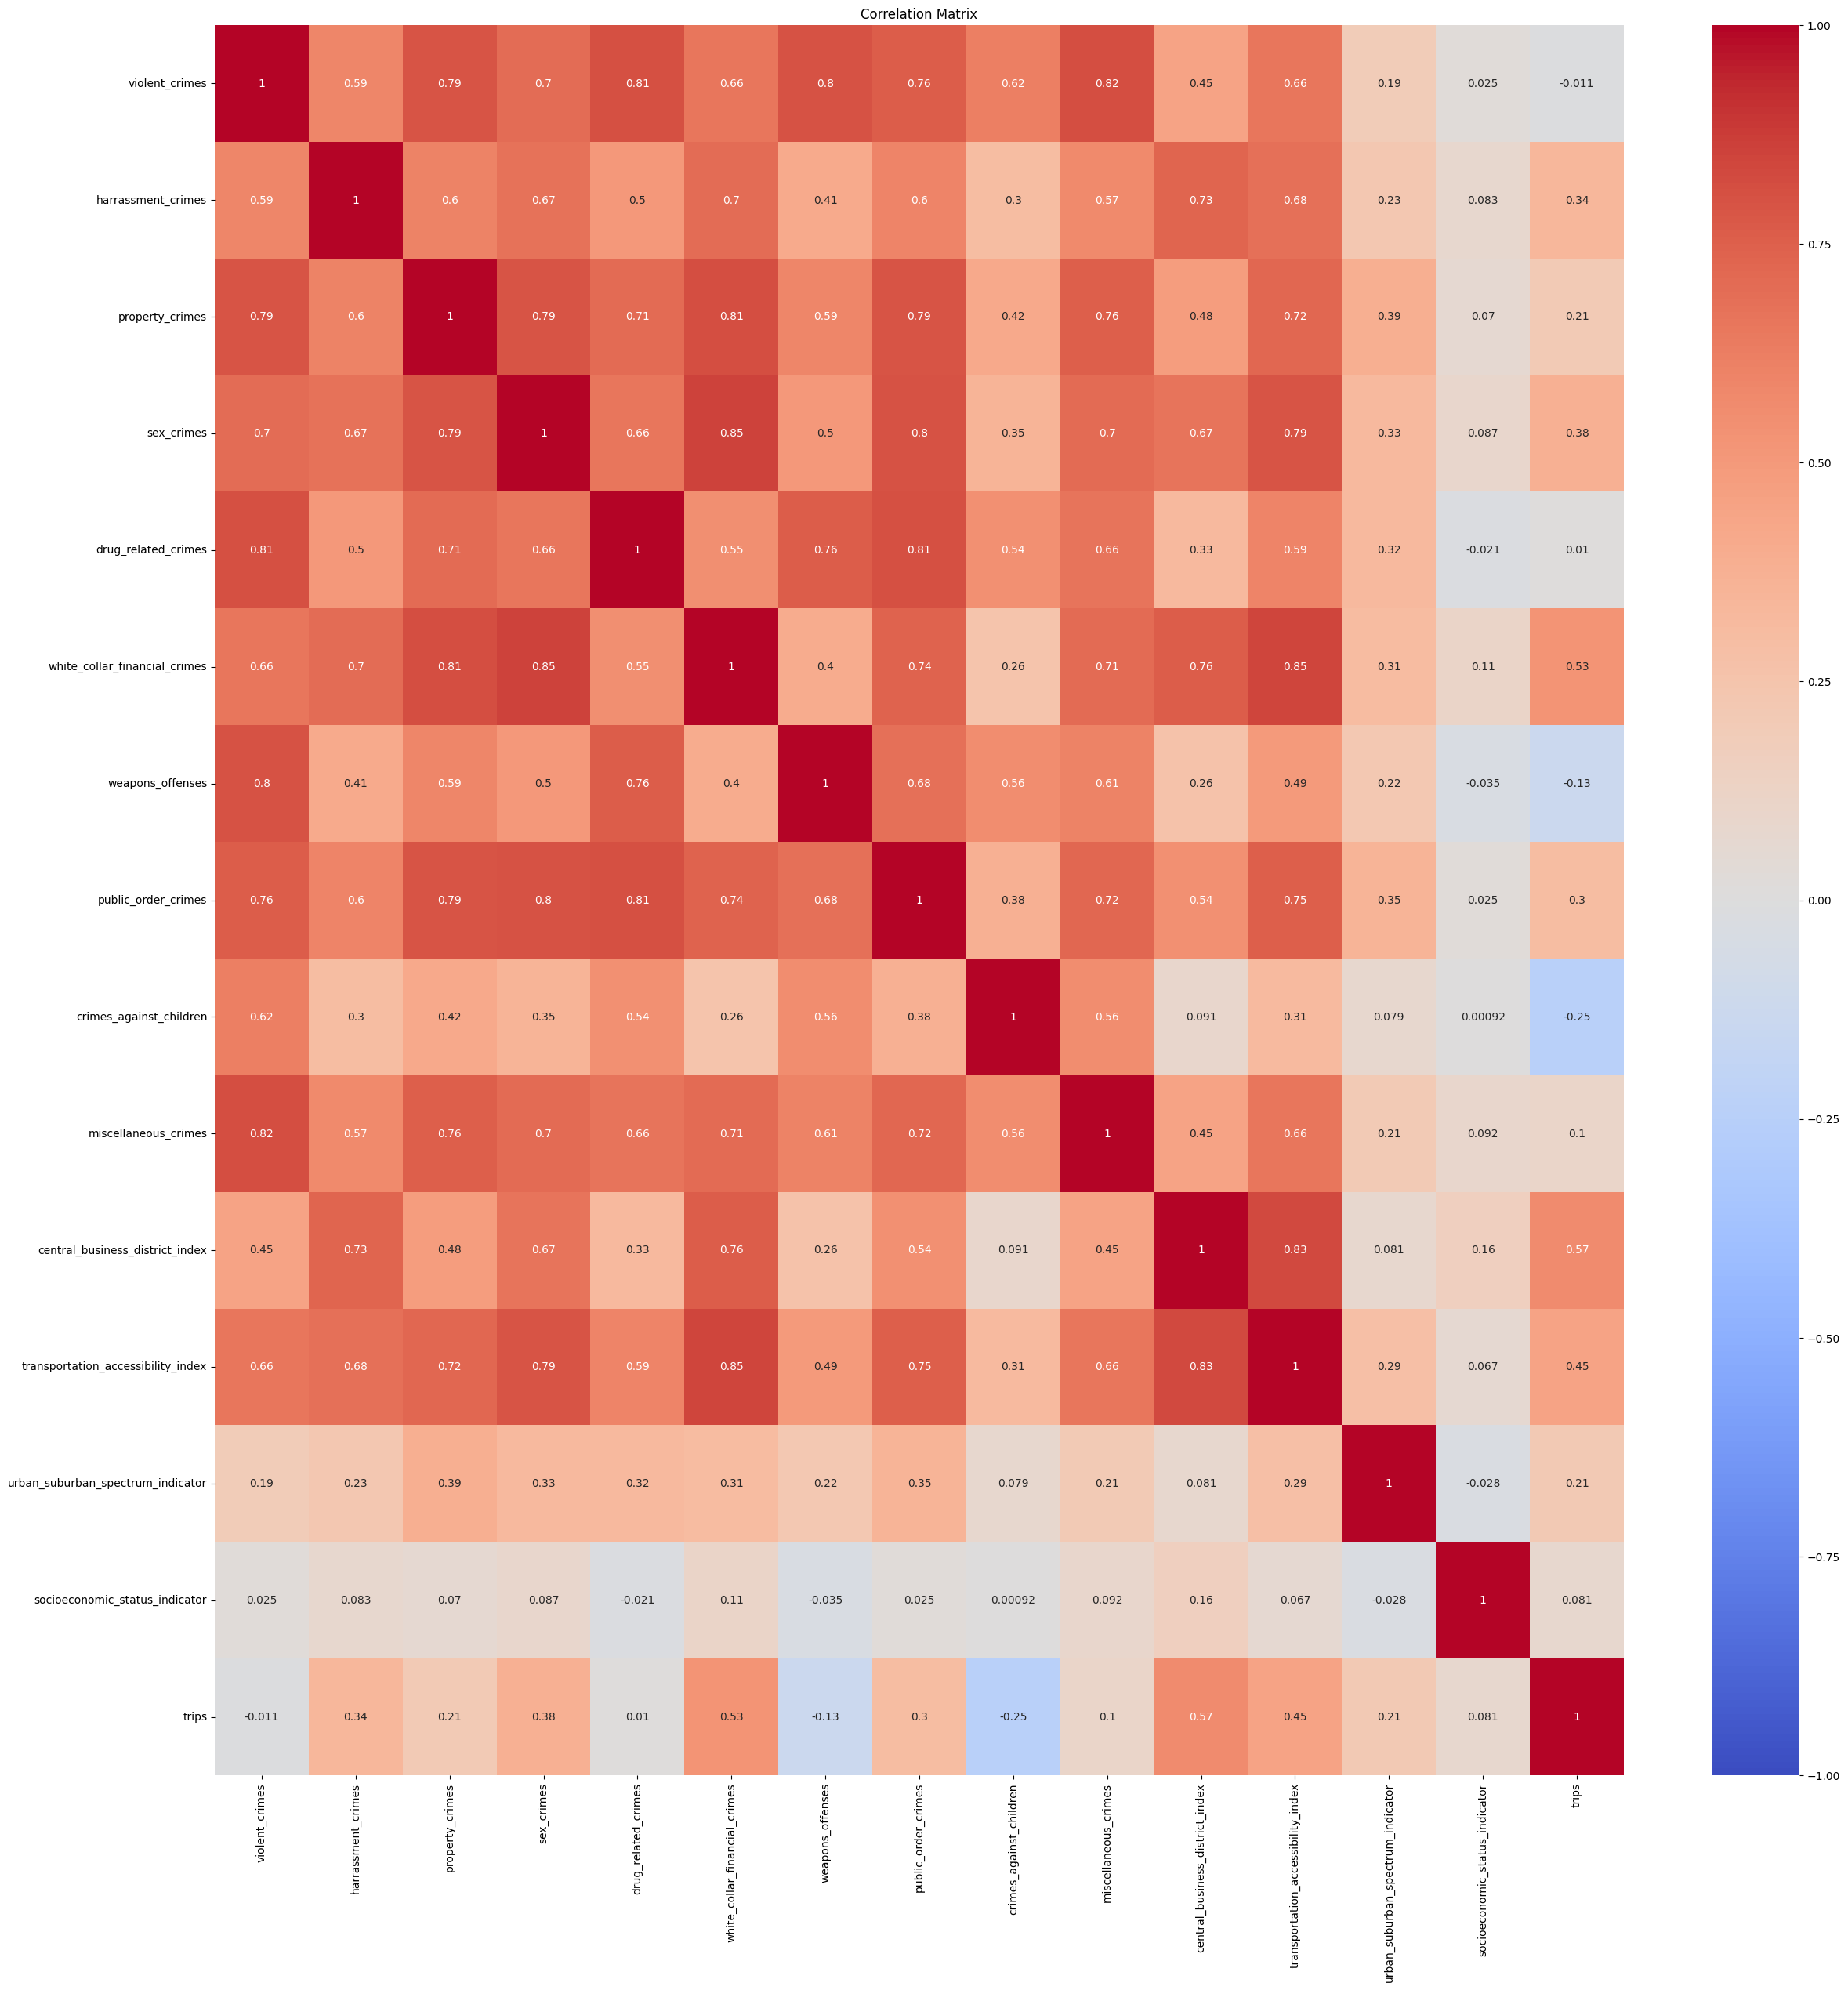

In [27]:
correlation_matrix = bike_composite_normalized.corr()

# Visualize the correlation matrix
plt.figure(figsize=(29, 29))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

### Evaluating correlation between the newly formed composite variables and trips

In [28]:
corr_with_trips = correlation_matrix['trips'].sort_values(ascending=False)
print(f"Correlations for {corr_with_trips}:")

Correlations for trips                                 1.000000
central_business_district_index       0.567670
white_collar_financial_crimes         0.528705
transportation_accessibility_index    0.450481
sex_crimes                            0.377540
harrassment_crimes                    0.339513
public_order_crimes                   0.297616
urban_suburban_spectrum_indicator     0.214696
property_crimes                       0.209129
miscellaneous_crimes                  0.103838
socioeconomic_status_indicator        0.081194
drug_related_crimes                   0.010194
violent_crimes                       -0.011469
weapons_offenses                     -0.132591
crimes_against_children              -0.246415
Name: trips, dtype: float64:


None of the variables have too high a correlation with trips. 
However, 
- central_business_district_index
- white_collar_financial_crimes
- transportation_accessibility_index

have relatively higher correlations.




Let's also run a drop1 test and try to interpret the values in conjunction with VIF and correlation values.


In [29]:
bike_composite_normalized.to_csv('bike_composite_norm.csv', index = False)

In [30]:
ols_inp = 'trips ~ '
for col in X.columns:
    if col == 'const':
        continue
    ols_inp += str(col) + ' ' + '+' + ' '

ols_inp[:-3]

'trips ~ violent_crimes + harrassment_crimes + property_crimes + sex_crimes + drug_related_crimes + white_collar_financial_crimes + weapons_offenses + public_order_crimes + crimes_against_children + miscellaneous_crimes + central_business_district_index + transportation_accessibility_index + urban_suburban_spectrum_indicator + socioeconomic_status_indicator'

In [31]:
X.head()

,const,violent_crimes,harrassment_crimes,property_crimes,sex_crimes,drug_related_crimes,white_collar_financial_crimes,weapons_offenses,public_order_crimes,crimes_against_children,miscellaneous_crimes,central_business_district_index,transportation_accessibility_index,urban_suburban_spectrum_indicator,socioeconomic_status_indicator
0,1.0,1.239313,1.028713,1.175994,2.128938,1.034912,1.535902,0.616536,1.388944,1.136838,0.415519,1.468148,0.951839,1.343113,0.631055
1,1.0,-0.582588,0.369963,0.074633,0.024254,-0.533186,0.024276,-1.696299,-0.353799,-0.707463,-0.373683,-0.504545,-0.365858,0.593409,0.631050
2,1.0,0.117273,-0.299036,-0.557883,-0.157825,0.121916,-1.053832,0.662293,-0.237681,1.006597,-0.345377,-0.462768,-0.754410,0.653259,0.631084
3,1.0,0.320976,-0.299036,-0.184395,0.218906,0.576464,-1.157670,1.199879,0.060042,0.863935,-0.133799,-0.610271,-0.534793,0.671926,1.755197
4,1.0,0.403177,-1.442696,0.794405,-0.142631,-0.181542,0.024276,-0.019493,0.255664,-2.582627,-0.571805,-0.537366,-0.399645,0.391873,0.631063


In [32]:
ols_inp[:-3]

'trips ~ violent_crimes + harrassment_crimes + property_crimes + sex_crimes + drug_related_crimes + white_collar_financial_crimes + weapons_offenses + public_order_crimes + crimes_against_children + miscellaneous_crimes + central_business_district_index + transportation_accessibility_index + urban_suburban_spectrum_indicator + socioeconomic_status_indicator'

In [33]:
# RUN THIS CODE in R

# bike_composite <- read.csv("bike_composite_norm.csv")



# # Fit the initial OLS model
# model <- lm(trips ~ violent_crimes + harrassment_crimes + property_crimes + sex_crimes + drug_related_crimes + white_collar_financial_crimes + weapons_offenses + public_order_crimes + crimes_against_children + miscellaneous_crimes + central_business_district_index + transportation_accessibility_index + urban_suburban_spectrum_indicator + socioeconomic_status_indicator, data = bike_composite)

# # Perform drop1 analysis
# drop1_result <- drop1(model, test = "F")

# # View the results
# print(drop1_result)



In [34]:
# Single term deletions

# Model:
# trips ~ violent_crimes + harrassment_crimes + property_crimes + 
#     sex_crimes + drug_related_crimes + white_collar_financial_crimes + 
#     weapons_offenses + public_order_crimes + crimes_against_children + 
#     miscellaneous_crimes + central_business_district_index + 
#     transportation_accessibility_index + urban_suburban_spectrum_indicator + 
#     socioeconomic_status_indicator
#                                    Df Sum of Sq    RSS     AIC F value    Pr(>F)    
# <none>                                          118.12 -249.63                      
# violent_crimes                      1    3.7182 121.83 -242.33  8.9715  0.002983 ** 
# harrassment_crimes                  1    0.0873 118.20 -251.41  0.2106  0.646669    
# property_crimes                     1    3.0519 121.17 -243.98  7.3639  0.007060 ** 
# sex_crimes                          1    0.4097 118.53 -250.59  0.9885  0.320963    
# drug_related_crimes                 1    0.5702 118.69 -250.19  1.3758  0.241794    
# white_collar_financial_crimes       1   17.9517 136.07 -209.19 43.3149 2.231e-10 ***
# weapons_offenses                    1    1.3850 119.50 -248.13  3.3419  0.068584 .  
# public_order_crimes                 1    7.8885 126.01 -232.24 19.0338 1.797e-05 ***
# crimes_against_children             1    0.8989 119.02 -249.36  2.1690  0.141926    
# miscellaneous_crimes                1    0.7709 118.89 -249.68  1.8600  0.173697    
# central_business_district_index     1    3.1478 121.27 -243.74  7.5952  0.006230 ** 
# transportation_accessibility_index  1    0.0356 118.15 -251.54  0.0860  0.769587    
# urban_suburban_spectrum_indicator   1    3.0912 121.21 -243.88  7.4586  0.006707 ** 
# socioeconomic_status_indicator      1    0.0223 118.14 -251.57  0.0538  0.816725    
# ---
# Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Among the significant predictors:

- violent_crimes
- property_crimes
- white_collar_financial_crimes
- public_order_crimes
- central_business_district_index
- urban_suburban_spectrum_indicator

the following had displayed high VIF.

- white_collar_financial_crimes
- violent_crimes
- central_business_district_index
- property_crimes



Thinking through which variables could be dropped for further analyses.

white_collar_financial_crimes:- central_business_district_index can be said to be highly correlated with incidences of white_collar_financial_crimes. There could be a fork relationship here, as both have moderate correlation with trips. Hence, we will retain white_collar_financial_crimes.

violent_crimes and property_crimes - These 2 can be said to be correlated given that the types of crimes in both of these require almost equal amounts of disregard for other humans. Both these have correlation with transportation_accessibility_indicator too, with both crimes to be slightly more prevalent in areas that rank higher on this index. transportation_accessibility_indicator itself has moderate correlation with trips.

There might be a fork relationship here - violent_crimes and property_crimes being more prevalent due to some other factos in better connected areas, and all of them having an impact on trips. So, we would include both of these in the model.

A similar remark can be made about central_business_district_index (w) in conjunction with transportation_accessibility_indicator.


Hence, let's proceed with all the variables in the model despite the multi-collinearity.


Let's build another OLS with just the significant variables.

In [35]:
bike_composite_normalized[ 
    ["violent_crimes", "property_crimes", "white_collar_financial_crimes", "public_order_crimes", "central_business_district_index", "urban_suburban_spectrum_indicator", "trips"]
].to_csv('bike_composite_norm_reduced.csv', index = False)




In [36]:
# Single term deletions

# Model:
# trips ~ violent_crimes + property_crimes + white_collar_financial_crimes + 
#     public_order_crimes + central_business_district_index + urban_suburban_spectrum_indicator
#                                   Df Sum of Sq    RSS     AIC F value    Pr(>F)    
# <none>                                         124.36 -250.18                      
# violent_crimes                     1    34.136 158.50 -179.41 80.4267 < 2.2e-16 ***
# property_crimes                    1     3.286 127.65 -244.35  7.7421 0.0057450 ** 
# white_collar_financial_crimes      1    22.946 147.31 -201.38 54.0623 1.953e-12 ***
# public_order_crimes                1     5.627 129.99 -238.90 13.2564 0.0003211 ***
# central_business_district_index    1     8.028 132.39 -233.41 18.9147 1.889e-05 ***
# urban_suburban_spectrum_indicator  1     2.329 126.69 -246.61  5.4881 0.0198156 *  
# ---
# Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [37]:
y = bike_composite_normalized['trips']

In [38]:
np.random.seed(0)

In [39]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold, cross_val_score
import numpy as np

In [40]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [41]:
alphas = np.logspace(-3, 3, 100)  # Example range

In [42]:
model = RidgeCV(alphas=alphas, cv=cv, scoring='neg_mean_squared_error')
model.fit(
    X[
    ["violent_crimes", "property_crimes", "white_collar_financial_crimes",\
     "public_order_crimes", "central_business_district_index", "urban_suburban_spectrum_indicator"]  ], 
    y)






RidgeCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_squared_error')

In [43]:
best_alpha = model.alpha_
best_alpha

2.848035868435802

In [44]:
final_model = Ridge(alpha=best_alpha)
final_model.fit(X[["violent_crimes", "property_crimes", "white_collar_financial_crimes", \
                   "public_order_crimes", "central_business_district_index", "urban_suburban_spectrum_indicator"]  ], y)

Ridge(alpha=2.848035868435802)

In [45]:
scores = cross_val_score(final_model, X[["violent_crimes", "property_crimes", "white_collar_financial_crimes",\
                                         "public_order_crimes", "central_business_district_index", "urban_suburban_spectrum_indicator"]  ], y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

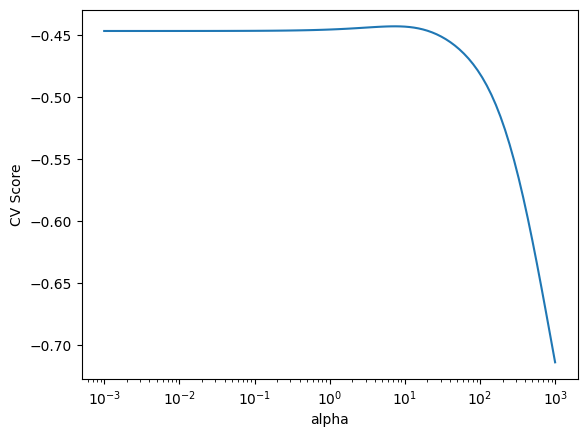

In [46]:
import matplotlib.pyplot as plt

alphas = np.logspace(-3, 3, 100)
cv_scores = [cross_val_score(Ridge(alpha=alpha), X, y, cv=cv, scoring='neg_mean_squared_error').mean() 
             for alpha in alphas]

plt.plot(alphas, cv_scores)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV Score')
plt.show()

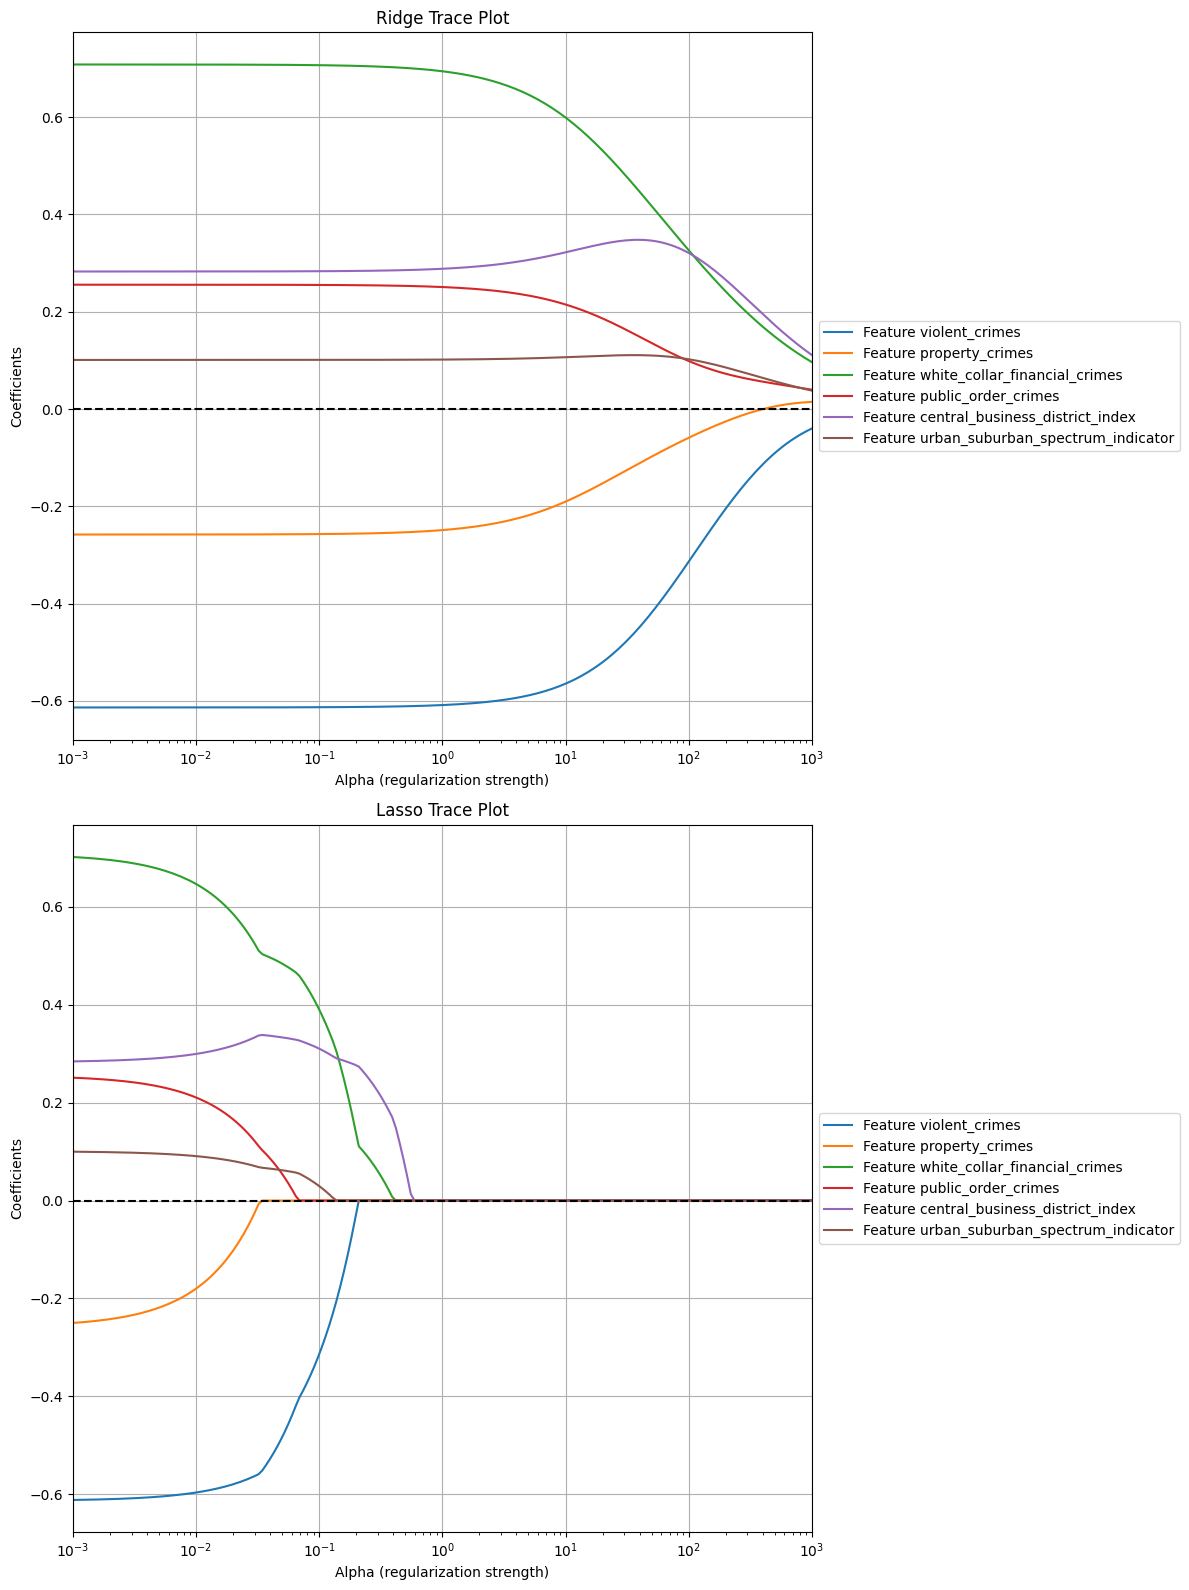

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

# # Generate sample data
# X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)
cols = X[["violent_crimes", "property_crimes", "white_collar_financial_crimes", "public_order_crimes", \
          "central_business_district_index", "urban_suburban_spectrum_indicator"]  ].columns

# # Standardize features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Define range of alpha values
alphas = np.logspace(-3, 3, 200)

# Function to fit model and get coefficients
def get_coefs(model_class, alphas, X, y):
    coefs = []
    for alpha in alphas:
        model = model_class(alpha=alpha)
        model.fit(X, y)
        coefs.append(model.coef_)
    return np.array(coefs)

# Get coefficients for Ridge and Lasso
ridge_coefs = get_coefs(Ridge, alphas, X[["violent_crimes", "property_crimes", "white_collar_financial_crimes", \
                                          "public_order_crimes", "central_business_district_index", "urban_suburban_spectrum_indicator"]  ], y)
lasso_coefs = get_coefs(Lasso, alphas, X[["violent_crimes", "property_crimes", "white_collar_financial_crimes",\
                                          "public_order_crimes", "central_business_district_index", "urban_suburban_spectrum_indicator"]  ], y)

# Function to plot trace
def plot_trace(ax, alphas, coefs, title):
    for i in range(X[["violent_crimes", "property_crimes", "white_collar_financial_crimes",\
                      "public_order_crimes", "central_business_district_index", "urban_suburban_spectrum_indicator"]  ].shape[1]):
        ax.semilogx(alphas, coefs[:, i], label=f'Feature {cols[i]}')
    ax.set_xlabel('Alpha (regularization strength)')
    ax.set_ylabel('Coefficients')
    ax.set_title(title)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(True)
    ax.axhline(y=0, color='k', linestyle='--')
    ax.set_xlim(alphas.min(), alphas.max())

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# Plot Ridge trace
plot_trace(ax1, alphas, ridge_coefs, 'Ridge Trace Plot')

# Plot Lasso trace
plot_trace(ax2, alphas, lasso_coefs, 'Lasso Trace Plot')

plt.tight_layout()
plt.show()

Based on observations from all the analyses:

Our conclusion about property_crimes affecting trips is unstable.

Our conclusions for the following being important predictors can be said to be reasonable -
- Violent crimes,
- white collar financial crimes,
- public order crimes,
- property crimes,
- central business district index
- urban suburban spectrum indicator 


However, here are some rather unintuitive observations:
- 'white collar financial crimes' affecting trips instead of a variable like 'sex crimes'
- 'harrassment crimes' and 'transportation_accessibility_index' not being significant